# Weather Data Analysis

### Import Dependencies

In [5]:
#import dependencies

import random
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt

from citipy import citipy
from config import api_key

import numpy as np

### Import of Country catalog 

ISO 3166 Countries with Regional Codes (https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes)

In [35]:

countries_catalog = pd.read_csv("Resources/ISO-3166-Countries-with-Regional-Codes.csv",encoding='utf-8', keep_default_na=False)
## added keep_default_na=False  because 'NA' country code was interpreted as NaN value instead of Namibia 

countries_catalog = countries_catalog[['name','alpha-2']]

countries_catalog.columns = ['country_name', 'country_code']

countries_catalog.head()

,country_name,country_code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [36]:
countries_catalog.count()

country_name    249
country_code    249
dtype: int64

In [38]:
#name = countries_catalog[(countries_catalog.country_code == 'AX')]['country_name']

name = countries_catalog[ countries_catalog["country_code"] == "NA" ].values.tolist()[0][0]

print(name)

Namibia


### Random latitudes

- Range Latitudes: -90 to +90
- Range Longitudes: -180 to +180

In [75]:
coord_list = []

#Generate 600 random lats and lons

ix = 0
jx = 100
#jx = 2

while(ix<36):
    
    range1 = -90 + (ix*5)
    range2 = range1 + 5 
    
    range3 = -180
    range4 = 180
    
    print(f'#### {ix}) Get {jx} random Lats from {range1}, {range2} and random Long from {range3}, {range4}')
    
    for i in range(jx):
        
        rand_lat = round( random.uniform(range1, range2) , 5) 
        rand_lon = round( random.uniform(range3, range4) , 5) 

        tmp = (rand_lat,rand_lon)
        coord_list.append(tmp)
    
    ix += 1

print(f'Coords: {len(coord_list)}')
## I had issues finding UNIQUE cities because the rando was too wide.. 
## so to solve this I started getting data from ranges from 10 to 10.. this is getting random numbers 
# from -90 to -80, then from -80 to -70

#### 0) Get 100 random Lats from -90, -85 and random Long from -180, 180
#### 1) Get 100 random Lats from -85, -80 and random Long from -180, 180
#### 2) Get 100 random Lats from -80, -75 and random Long from -180, 180
#### 3) Get 100 random Lats from -75, -70 and random Long from -180, 180
#### 4) Get 100 random Lats from -70, -65 and random Long from -180, 180
#### 5) Get 100 random Lats from -65, -60 and random Long from -180, 180
#### 6) Get 100 random Lats from -60, -55 and random Long from -180, 180
#### 7) Get 100 random Lats from -55, -50 and random Long from -180, 180
#### 8) Get 100 random Lats from -50, -45 and random Long from -180, 180
#### 9) Get 100 random Lats from -45, -40 and random Long from -180, 180
#### 10) Get 100 random Lats from -40, -35 and random Long from -180, 180
#### 11) Get 100 random Lats from -35, -30 and random Long from -180, 180
#### 12) Get 100 random Lats from -30, -25 and random Long from -180, 180
#### 13) Get 100 random Lats from -25, -20 and r

### Get the cities

These have to be at least 500 unique cities

In [76]:
cities = []

for coord in coord_list:
    
    city = citipy.nearest_city(coord[0],coord[1])
    city_name = city.city_name
    country_code = city.country_code
    try:
        country_name = countries_catalog[ countries_catalog["country_code"] == country_code.upper() ].values.tolist()[0][0]
    except:
        print(f'Not found in catalog {country_code.upper()}')
        country_name = ''
    
    #print(f'processing #  City Name: {city_name} - Country Code: {country_code}')
    
    tmp = (city_name, country_code, country_name)
    cities.append(tmp)

Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog AN
Not found in catalog AN


In [77]:
len(cities)

3600

In [78]:
unique_cities = list(set(cities))

In [79]:
len(unique_cities)

1139

### Data Retrival

OpenWeatherMap - Weather API

In [80]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url_tmp = f'{url}appid={api_key}&units={units}&'


In [81]:
#coord_list = [(lat,lon)]
city_name_list = []
country_code_lsit = []
country_name_list = []

lon_api_list = []
lat_api_list = []
temp_list = []
humidity_list = []
wind_list = []
clouds = []
country_api = []
city_id_api = []
city_api = []

i = 0
# Loop through the list of cities and perform a request for data on each
for cities in unique_cities:
    
    i += 1
    print(f'[#######] {i}: Place: {cities[0].capitalize()}, {cities[2].capitalize()}')
    
    query_url = query_url_tmp + f'q={cities[0]},{cities[1]}'
    
    #print(query_url) #do not print when pushing to github
    try:
        response = requests.get(query_url).json()
        response['sys']['country']
    except:
        print(f'[#######] PLACE NOT FOUND: {cities[0].capitalize()}, {cities[2].capitalize()}')
        continue
    
    city_name_list.append(cities[0].capitalize())
    country_code_lsit.append(cities[1].upper())
    country_name_list.append(cities[2].capitalize())
    
    lon_api_list.append(response['coord']['lon'])
    lat_api_list.append(response['coord']['lat'])
    temp_list.append(response['main']['temp'])
    humidity_list.append(response['main']['humidity'])
    wind_list.append(response['wind']['speed'])
    clouds.append(response['clouds']['all'])
    country_api.append(response['sys']['country'])
    city_id_api.append(response['id'])
    city_api.append(response['name'])
    
    #print(response)



[#######] 1: Place: Saint-joseph, Réunion
[#######] 2: Place: Kavaratti, India
[#######] 3: Place: Guerrero negro, Mexico
[#######] 4: Place: Mikuni, Japan
[#######] 5: Place: Arlit, Niger
[#######] 6: Place: Ulundi, South africa
[#######] 7: Place: Moron, Mongolia
[#######] 8: Place: Neiafu, Tonga
[#######] 9: Place: Nushki, Pakistan
[#######] 10: Place: Namtsy, Russian federation
[#######] 11: Place: Seybaplaya, Mexico
[#######] 12: Place: Leningradskiy, Russian federation
[#######] 13: Place: Sangar, Russian federation
[#######] 14: Place: Kichera, Russian federation
[#######] 15: Place: Den helder, Netherlands
[#######] 16: Place: Raudeberg, Norway
[#######] 17: Place: Galle, Sri lanka
[#######] 18: Place: Sheridan, United states of america
[#######] 19: Place: Deputatskiy, Russian federation
[#######] 20: Place: Marica, Brazil
[#######] 21: Place: Channel-port aux basques, Canada
[#######] 22: Place: Aksay, Kazakhstan
[#######] 23: Place: Shangzhi, China
[#######] 24: Place: Lecce

[#######] 165: Place: Ypsonas, Cyprus
[#######] 166: Place: Zachagansk, Kazakhstan
[#######] PLACE NOT FOUND: Zachagansk, Kazakhstan
[#######] 167: Place: Tubruq, Libya
[#######] PLACE NOT FOUND: Tubruq, Libya
[#######] 168: Place: Chapleau, Canada
[#######] 169: Place: Fort nelson, Canada
[#######] 170: Place: Champerico, Guatemala
[#######] 171: Place: Mahenge, Tanzania, united republic of
[#######] 172: Place: Stornoway, United kingdom of great britain and northern ireland
[#######] 173: Place: Sisimiut, Greenland
[#######] 174: Place: Margate, South africa
[#######] 175: Place: Humaita, Brazil
[#######] PLACE NOT FOUND: Humaita, Brazil
[#######] 176: Place: Lata, Solomon islands
[#######] PLACE NOT FOUND: Lata, Solomon islands
[#######] 177: Place: Ouesso, Congo
[#######] 178: Place: Oporapa, Colombia
[#######] 179: Place: Sapouy, Burkina faso
[#######] 180: Place: Coyuca, Mexico
[#######] PLACE NOT FOUND: Coyuca, Mexico
[#######] 181: Place: Zhaotong, China
[#######] 182: Place: E

[#######] 326: Place: Lesnoy, Russian federation
[#######] 327: Place: Minas, Uruguay
[#######] 328: Place: Coquimbo, Chile
[#######] 329: Place: Lakeside, United states of america
[#######] 330: Place: Yar-sale, Russian federation
[#######] 331: Place: Santa maria, Cabo verde
[#######] 332: Place: Solin, Croatia
[#######] 333: Place: Susah, Tunisia
[#######] PLACE NOT FOUND: Susah, Tunisia
[#######] 334: Place: Kupang, Indonesia
[#######] 335: Place: Esperance, Australia
[#######] 336: Place: Svetlogorsk, Russian federation
[#######] 337: Place: Inhambane, Mozambique
[#######] 338: Place: Lluta, Peru
[#######] 339: Place: Capanema, Brazil
[#######] 340: Place: Bosobolo, Congo (democratic republic of the)
[#######] 341: Place: Waingapu, Indonesia
[#######] 342: Place: Cape town, South africa
[#######] 343: Place: Hervey bay, Australia
[#######] 344: Place: Mincivan, Azerbaijan
[#######] 345: Place: Caraballeda, Venezuela (bolivarian republic of)
[#######] 346: Place: Redmond, United st

[#######] 493: Place: Rock sound, Bahamas
[#######] 494: Place: Shubarkuduk, Kazakhstan
[#######] 495: Place: Tidore, Indonesia
[#######] PLACE NOT FOUND: Tidore, Indonesia
[#######] 496: Place: Cayambe, Ecuador
[#######] 497: Place: Barcelos, Brazil
[#######] 498: Place: Bandiagara, Mali
[#######] 499: Place: El balyana, Egypt
[#######] PLACE NOT FOUND: El balyana, Egypt
[#######] 500: Place: Agsu, Azerbaijan
[#######] PLACE NOT FOUND: Agsu, Azerbaijan
[#######] 501: Place: La ronge, Canada
[#######] 502: Place: China, Mexico
[#######] 503: Place: Severo-kurilsk, Russian federation
[#######] 504: Place: Laukaa, Finland
[#######] 505: Place: Hovd, Mongolia
[#######] 506: Place: Georgetown, Guyana
[#######] 507: Place: Jalu, Libya
[#######] 508: Place: Ngunguru, New zealand
[#######] 509: Place: Broken hill, Australia
[#######] 510: Place: Port augusta, Australia
[#######] 511: Place: Sept-iles, Canada
[#######] 512: Place: Phan rang, Viet nam
[#######] PLACE NOT FOUND: Phan rang, Viet 

[#######] 657: Place: Tazmalt, Algeria
[#######] 658: Place: Pyu, Myanmar
[#######] 659: Place: Hofn, Iceland
[#######] 660: Place: Ostrovnoy, Russian federation
[#######] 661: Place: Nan, Thailand
[#######] 662: Place: Hope, United states of america
[#######] 663: Place: Mahadday weyne, Somalia
[#######] PLACE NOT FOUND: Mahadday weyne, Somalia
[#######] 664: Place: Jamestown, Saint helena, ascension and tristan da cunha
[#######] 665: Place: Marinette, United states of america
[#######] 666: Place: Busselton, Australia
[#######] 667: Place: Pedernales, Ecuador
[#######] 668: Place: Omboue, Gabon
[#######] 669: Place: Syracuse, Italy
[#######] PLACE NOT FOUND: Syracuse, Italy
[#######] 670: Place: Vitim, Russian federation
[#######] 671: Place: Milkovo, Russian federation
[#######] PLACE NOT FOUND: Milkovo, Russian federation
[#######] 672: Place: Masuda, Japan
[#######] 673: Place: Jasper, United states of america
[#######] 674: Place: Los llanos de aridane, Spain
[#######] 675: Plac

[#######] 816: Place: Tonekabon, Iran (islamic republic of)
[#######] 817: Place: Rivera, Colombia
[#######] 818: Place: Zimmi, Sierra leone
[#######] 819: Place: Eganville, Canada
[#######] 820: Place: Jiangyou, China
[#######] 821: Place: Manta, Ecuador
[#######] 822: Place: Buchanan, Liberia
[#######] 823: Place: Neenah, United states of america
[#######] 824: Place: Santa fe, Cuba
[#######] 825: Place: Noyabrsk, Russian federation
[#######] 826: Place: Voi, Kenya
[#######] 827: Place: Nizhneyansk, Russian federation
[#######] PLACE NOT FOUND: Nizhneyansk, Russian federation
[#######] 828: Place: Hami, China
[#######] 829: Place: Sahrak, Afghanistan
[#######] PLACE NOT FOUND: Sahrak, Afghanistan
[#######] 830: Place: Linqiong, China
[#######] 831: Place: Azimur, Morocco
[#######] PLACE NOT FOUND: Azimur, Morocco
[#######] 832: Place: Salalah, Oman
[#######] 833: Place: Southampton, Canada
[#######] 834: Place: Ust-kut, Russian federation
[#######] 835: Place: Asau, Tuvalu
[#######] 

[#######] 990: Place: Tenenkou, Mali
[#######] 991: Place: Shache, China
[#######] 992: Place: Narsaq, Greenland
[#######] 993: Place: Uyuni, Bolivia (plurinational state of)
[#######] 994: Place: Young, Uruguay
[#######] 995: Place: Ponta do sol, Portugal
[#######] 996: Place: Santa catalina, Colombia
[#######] 997: Place: Bar harbor, United states of america
[#######] 998: Place: Hithadhoo, Maldives
[#######] 999: Place: Abu dhabi, United arab emirates
[#######] 1000: Place: Huayang, China
[#######] 1001: Place: Norsup, Vanuatu
[#######] 1002: Place: Bilma, Niger
[#######] 1003: Place: Borazjan, Iran (islamic republic of)
[#######] 1004: Place: Iglesias, Italy
[#######] 1005: Place: Barnstaple, United kingdom of great britain and northern ireland
[#######] 1006: Place: Sao felix do xingu, Brazil
[#######] 1007: Place: Alofi, Niue
[#######] 1008: Place: Yerbogachen, Russian federation
[#######] 1009: Place: Owando, Congo
[#######] 1010: Place: Novocheremshansk, Russian federation
[###

In [82]:
# Cities found on the WeatherAPI

len(city_api)

1001

### Pandas Dataframe creation

In [84]:
weather_data = pd.DataFrame(
                {'City_citipy': city_name_list,
                'Country_code_citipy': country_code_lsit,
                 'Country_Name_ISO': country_name_list,
                'City_ID': city_id_api,
                'City': city_api,
                'Country': country_api,
                'Longitude': lon_api_list,
                'Latitude': lat_api_list,
                'Temperature': temp_list,
                'Humidity': humidity_list,
                'Wind': wind_list,
                'Clouds': clouds
                })


weather_data.head()

,City_citipy,Country_code_citipy,Country_Name_ISO,City_ID,City,Country,Longitude,Latitude,Temperature,Humidity,Wind,Clouds
0,Saint-joseph,RE,Réunion,6690296,Saint-Joseph,RE,55.62,-21.37,30.46,58,4.60,20
1,Kavaratti,IN,India,1267390,Kavaratti,IN,72.64,10.57,28.14,100,2.66,0
2,Guerrero negro,MX,Mexico,4021858,Guerrero Negro,MX,-114.04,27.97,14.41,99,2.91,92
3,Mikuni,JP,Japan,1857260,Mikuni,JP,136.15,36.22,6.00,94,1.50,75
4,Arlit,NE,Niger,2447513,Arlit,NE,7.39,18.74,7.24,82,1.31,0


In [25]:
weather_data = pd.read_csv("output/weather_data.csv",encoding='utf-8')

weather_data.count()

City_citipy            1001
Country_code_citipy     994
Country_Name_ISO        994
City_ID                1001
City                   1001
Country                 994
Longitude              1001
Latitude               1001
Temperature            1001
Humidity               1001
Wind                   1001
Clouds                 1001
dtype: int64

### Charting

##### Longitude vs Latitude

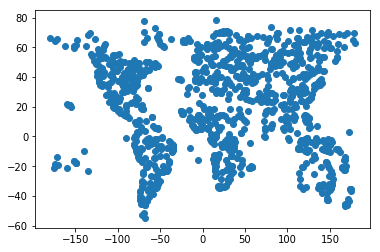

In [31]:
x = weather_data['Longitude'].values
y = weather_data['Latitude'].values

plt.plot(x, y, 'o');

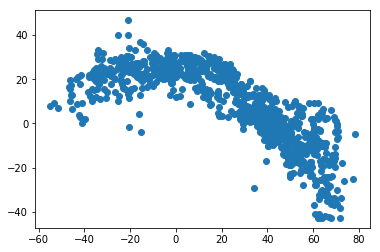

In [32]:
x = weather_data['Latitude'].values
y = weather_data['Temperature'].values

plt.plot(x, y, 'o');

---

### Data analysis

- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude

### Export Data Frame to CSV



In [86]:
file_name = 'output/weather_data.csv'

weather_data.to_csv(file_name, encoding='utf-8', index=False)